In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

In [2]:
# Parameters
B = 200   # number of bootstrap samples
N = 20    # sample size
X = np.random.randn(N)   # generate N samples from standard normal distribution

print("sample mean of X:", X.mean())

sample mean of X: 0.3354944164880149


In [3]:
# Bootstrap resampling
individual_estimates = np.empty(B)   # store bootstrap sample means
for b in range(B):
  # draw a bootstrap sample (sample with replacement from X)
  sample = np.random.choice(X, size=N)
  individual_estimates[b] = sample.mean()

In [4]:
# Bootstrap statistics
bmean = individual_estimates.mean()   # mean of bootstrap estimates
bstd = individual_estimates.std()     # std deviation of bootstrap estimates

# Compute 95% CI using normal approximation
# norm.ppf(0.025) ≈ -1.96, norm.ppf(0.975) ≈ +1.96
lower = bmean + norm.ppf(0.025)*bstd
upper = bmean + norm.ppf(0.975)*bstd

In [5]:
# Traditional confidence interval (normal theory)
# CI = sample mean ± 1.96 * (sample std / sqrt(N))
lower2 = X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N)

print("bootstrap mean of X:", bmean)

bootstrap mean of X: 0.3659800455504143


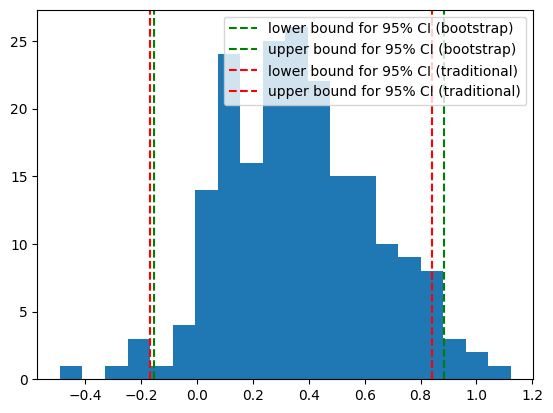

In [6]:
# Visualization
plt.hist(individual_estimates, bins=20)   # histogram of bootstrap sample means

# Add vertical lines for bootstrap CI
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95% CI (bootstrap)")

# Add vertical lines for traditional CI
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95% CI (traditional)")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95% CI (traditional)")

plt.legend()
plt.show()